Sheetal
student id-21007564

## Dataset 2


### Importing libraries

In [ ]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#warnings.filterwarnings('always')

### Importing the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

import io

dataset = pd.read_csv(io.BytesIO(uploaded['Processed_Combined_IoT_dataset.csv']))

Saving Processed_Combined_IoT_dataset.csv to Processed_Combined_IoT_dataset.csv


### Exploratory Data Analysis

In [ ]:
dataset.head()

In [ ]:
print(dataset.shape)

In [ ]:
print(list(dataset.columns))

In [ ]:
target_cols=[dataset.columns[-1]]
target_cols

In [ ]:
feature_cols= list(dataset.columns[:-1])
feature_cols

### Split Dataset

In [ ]:
# Split dataset in features and target variable
X = dataset.drop('label', axis=1) # Features
y = dataset['label'] # Target variable

In [ ]:
X.head()

In [ ]:
y.head()

### Splitting Data

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

### Building Random Forest Model

In [ ]:
def fit_model(model, features, labels):
  #Calculate start time
  start = timeit.default_timer()

  #Train the model using the training sets y_pred=clf.predict(X_test)
  model.fit(features, labels)

  #Calculate Stop time
  stop = timeit.default_timer()
  train_time= stop - start
  return train_time

In [ ]:
def predict_on_test(model, test_features):
  # Calculate start time
  start = timeit.default_timer()

  # Predict the model
  y_pred = model.predict(X_test)

  # Calculate Stop time
  stop = timeit.default_timer()
  test_time = stop - start
  return y_pred, test_time

In [ ]:
# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)
train_time = fit_model(clf, X_train, y_train)
y_pred, test_time = predict_on_test(clf, X_test)

### Evaluating Model

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)
print(classification_report(y_test,y_pred))

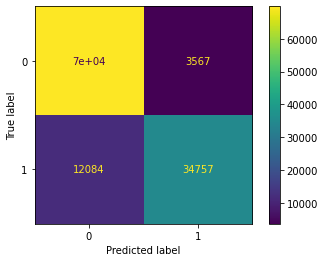

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
def print_evaluation_metrics(y_test, y_pred, train_time, test_time):
  # Model Accuracy: how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

  # Model Precision: what percentage of positive tuples are labeled as such?
  print("Precision:",metrics.precision_score(y_test, y_pred))

  # Model Recall: what percentage of positive tuples are labelled as such?
  print("Recall:",metrics.recall_score(y_test, y_pred))

  #Calculate F1 Score
  print("F1 Score:",metrics.f1_score(y_test, y_pred))

  #Calculate Mean Absolute Error
  print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

  # kappa
  print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

  # ROC AUC
  print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

  #Train time
  print('Train Time(s): ',train_time)

  #Test time
  print('Test Time(s): ',test_time)

In [ ]:
print_evaluation_metrics(y_test, y_pred, train_time, test_time)

### Build K-Nearest Neighbours Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Create a KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
train_time = fit_model(knn_clf, X_train, y_train)
knn_y_pred, test_time = predict_on_test(knn_clf, X_test)

### Evaluating KNN Model

In [ ]:
conf_mat = confusion_matrix(y_test,knn_y_pred)
print(conf_mat)
print(classification_report(y_test,knn_y_pred))

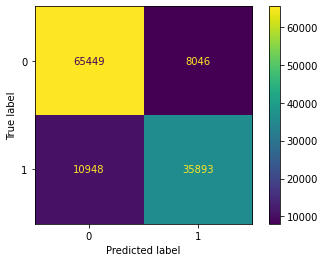

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
print_evaluation_metrics(y_test, knn_y_pred, train_time, test_time)

### Build Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression(random_state=0)
train_time = fit_model(logistic_clf, X_train, y_train)
logistic_y_pred, test_time = predict_on_test(logistic_clf, X_test)

In [ ]:
conf_mat = confusion_matrix(y_test, logistic_y_pred)
print(conf_mat)
print(classification_report(y_test, logistic_y_pred))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
print_evaluation_metrics(y_test, logistic_y_pred, train_time, test_time)

## **Build SVM Model**


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier

svm_classifier= make_pipeline(StandardScaler(),
                           SGDClassifier(max_iter=500, tol=1e-20, n_iter_no_change=5, learning_rate='adaptive', early_stopping=True, eta0=1e-2))
train_time = fit_model(svm_classifier, X_train, y_train)
svm_y_pred, test_time = predict_on_test(svm_classifier, X_test)

In [ ]:
conf_mat = confusion_matrix(y_test, svm_y_pred)
print(conf_mat)
print(classification_report(y_test, svm_y_pred))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
print_evaluation_metrics(y_test, svm_y_pred, train_time, test_time)

## Decision Tree **Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

dt_classifier = DecisionTreeClassifier(random_state=17)
train_time = fit_model(dt_classifier, X_train, y_train)
dt_y_pred, test_time = predict_on_test(dt_classifier, X_test)

In [ ]:
conf_mat = confusion_matrix(y_test, dt_y_pred)
print(conf_mat)
print(classification_report(y_test, dt_y_pred))

[[69364  4131]
 [12143 34698]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90     73495
           1       0.89      0.74      0.81     46841

    accuracy                           0.86    120336
   macro avg       0.87      0.84      0.85    120336
weighted avg       0.87      0.86      0.86    120336



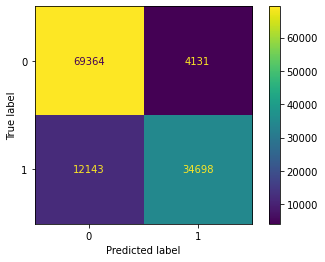

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
print_evaluation_metrics(y_test, dt_y_pred, train_time, test_time)

### Naive Bayes **Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
train_time = fit_model(nb_clf, X_train, y_train)
nb_y_pred, test_time = predict_on_test(nb_clf, X_test)


In [ ]:
conf_mat = confusion_matrix(y_test, nb_y_pred)
print(conf_mat)
print(classification_report(y_test, nb_y_pred))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
print_evaluation_metrics(y_test, nb_y_pred, train_time, test_time)

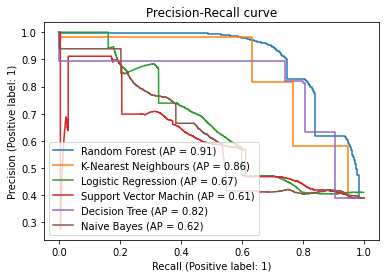

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

plot_precision_recall_curve(clf, X_test, y_test, ax = plt.gca(),name = "Random Forest")
plot_precision_recall_curve(knn_clf, X_test, y_test, ax = plt.gca(),name = "K-Nearest Neighbours")
plot_precision_recall_curve(logistic_clf, X_test, y_test, ax = plt.gca(),name = "Logistic Regression")
plot_precision_recall_curve(svm_classifier, X_test, y_test, ax = plt.gca(),name = "Support Vector Machin")
plot_precision_recall_curve(dt_classifier, X_test, y_test, ax = plt.gca(),name = "Decision Tree")
plot_precision_recall_curve(nb_clf, X_test, y_test, ax = plt.gca(),name = "Naive Bayes")

plt.title('Precision-Recall curve')
plt.show()